In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [41]:
features_df=pd.read_csv("training_set_features.csv")
labels_df=pd.read_csv("training_set_labels.csv")

In [42]:
features_df.head()


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [43]:
labels_df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [44]:
features_df.nunique()

,0
respondent_id,26707
xyz_concern,4
xyz_knowledge,3
behavioral_antiviral_meds,2
behavioral_avoidance,2
behavioral_face_mask,2
behavioral_wash_hands,2
behavioral_large_gatherings,2
behavioral_outside_home,2
behavioral_touch_face,2


In [45]:
dataset=pd.merge(features_df,labels_df,on='respondent_id')

In [46]:
dataset.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [47]:
cols_to_use=['respondent_id','xyz_concern', 'xyz_knowledge','behavioral_antiviral_meds', 'behavioral_avoidance','behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker','health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk','opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc','xyz_vaccine','seasonal_vaccine']
dataset=dataset[cols_to_use]

In [48]:
print(dataset.isna().sum())

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
xyz_vaccine                        0
seasonal_vaccine                   0
dtype: int64


In [49]:
cols_zero=['health_insurance','opinion_xyz_vacc_effective', 'opinion_xyz_risk','opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc']
dataset[cols_zero]=dataset[cols_zero].fillna(0)
print(dataset.isna().sum())

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64


In [50]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
df=imputer.fit_transform(dataset)
df=pd.DataFrame(df,columns=dataset.columns)

In [51]:
print(df.isna().sum())

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
xyz_vaccine                    0
seasonal_vaccine               0
dtype: int64


In [52]:
X = df.drop(columns=['respondent_id','xyz_vaccine', 'seasonal_vaccine'])
Y = df[['xyz_vaccine', 'seasonal_vaccine']]

In [53]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y=train_test_split(X,Y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
reg=LogisticRegression(random_state=10,max_iter=1000)
model=MultiOutputClassifier(reg)
model.fit(train_X,train_Y)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                   random_state=10))

In [55]:
Y_probabilities_pred=model.predict_proba(test_X)
Y_probabilities_pred_xyz=Y_probabilities_pred[0][:,1]
Y_probabilities_pred_seasonal=Y_probabilities_pred[1][:,1]

In [56]:
Y_probabilities_pred

[array([[0.99531571, 0.00468429],
        [0.99492495, 0.00507505],
        [0.8636268 , 0.1363732 ],
        ...,
        [0.15738849, 0.84261151],
        [0.91961764, 0.08038236],
        [0.93844961, 0.06155039]]),
 array([[0.94874478, 0.05125522],
        [0.9422187 , 0.0577813 ],
        [0.11697148, 0.88302852],
        ...,
        [0.4278516 , 0.5721484 ],
        [0.25911623, 0.74088377],
        [0.22750534, 0.77249466]])]

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score_xyz=roc_auc_score(test_Y['xyz_vaccine'],Y_probabilities_pred_xyz)
roc_auc_score_seasonal=roc_auc_score(test_Y['seasonal_vaccine'],Y_probabilities_pred_seasonal)
mean_roc_auc=(roc_auc_score_xyz+roc_auc_score_seasonal)/2

In [58]:
print(roc_auc_score_xyz)
print(roc_auc_score_seasonal)
print(mean_roc_auc)

0.8481486734067853
0.8256401039763666
0.836894388691576


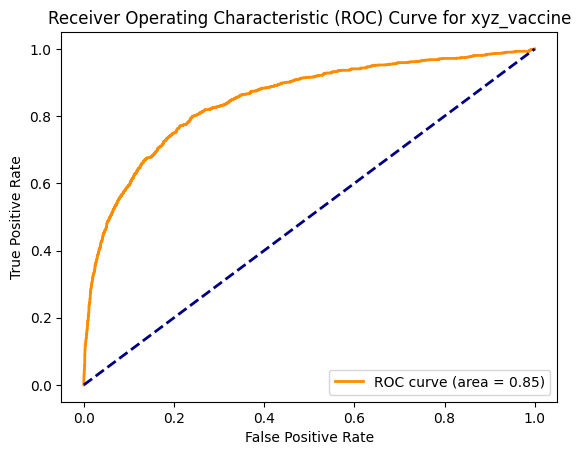

In [59]:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_Y['xyz_vaccine'], Y_probabilities_pred_xyz)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for xyz_vaccine')
plt.legend(loc="lower right")
plt.show()

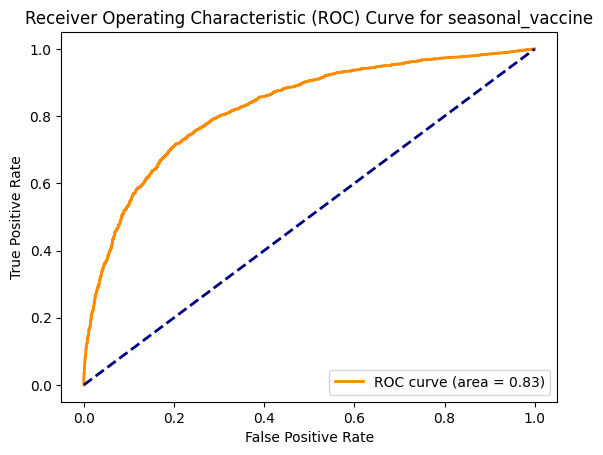

In [60]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_Y['seasonal_vaccine'], Y_probabilities_pred_seasonal)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for seasonal_vaccine')
plt.legend(loc="lower right")
plt.show()

In [61]:
test_features_df=pd.read_csv('test_set_features.csv')

In [62]:
cols_to_use=['xyz_concern', 'xyz_knowledge','behavioral_antiviral_meds', 'behavioral_avoidance','behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker','health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk','opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc']
test_features=test_features_df[cols_to_use]
print(test_features.isna().sum())

xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
dtype: int64


In [63]:
cols_zero=['health_insurance','opinion_xyz_vacc_effective', 'opinion_xyz_risk','opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc']
test_features = test_features.copy()
test_features.loc[:,cols_zero]=test_features.loc[:,cols_zero].fillna(0)

In [64]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
test_df=imputer.fit_transform(test_features)
test_df=pd.DataFrame(test_df,columns=test_features.columns)

In [65]:
test_df_probabilities_pred=model.predict_proba(test_df)
test_df_probabilities_pred_xyz=test_df_probabilities_pred[0][:,1]
test_df_probabilities_pred_xyz=test_df_probabilities_pred_xyz.round(1)
test_df_probabilities_pred_seasonal=test_df_probabilities_pred[1][:,1]
test_df_probabilities_pred_seasonal=test_df_probabilities_pred_seasonal.round(1)

In [66]:
from sklearn.metrics import accuracy_score

#Baseline model:predict majority class
majority_class_xyz = train_Y['xyz_vaccine'].mode()[0]
baseline_pred_xyz = [majority_class_xyz] * len(test_Y)

Y_pred_xyz = (Y_probabilities_pred_xyz >= 0.5).astype(int)

# baseline error
baseline_error = 1 - accuracy_score(test_Y['xyz_vaccine'], baseline_pred_xyz)
print(f"Baseline Error: {baseline_error:.2f}")

# model error
model_error = 1 - accuracy_score(test_Y['xyz_vaccine'], Y_pred_xyz)
print(f"Model Error: {model_error:.2f}")

#error reduction percentage
error_reduction = ((baseline_error - model_error) / baseline_error) * 100
print(f"Prediction Error Reduced by: {error_reduction:.2f}%")


Baseline Error: 0.21
Model Error: 0.15
Prediction Error Reduced by: 28.67%


In [67]:
submission_df=pd.DataFrame({'respondent_id':test_features_df['respondent_id'],'h1n1_vaccine':test_df_probabilities_pred_xyz,'seasonal_vaccine':test_df_probabilities_pred_seasonal})

In [68]:
submission_df.to_csv('submission.csv',index=False)